In [15]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from scipy.optimize import minimize
import scipy.constants as const

In [40]:
#cuts off a distance array such that it only has elements < a certain length

def dist_cutoff(dist, dist_lim):
    distance = []
    for x in dist:
        if (x < dist_lim):
            distance.append(x)
    return np.asarray(distance)

In [41]:
#cuts off a density array at a given number of elements
#not in place

def dens_cutoff(dens, n_elements):
    densities = np.zeros(n_elements)
    for i in range(0, n_elements):
        densities[i] = dens[i]
    return densities

In [42]:
# Trying to fit a Gaussian

def expon(r, rc, rho):
    return rho * np.exp(-1*(r/rc))

In [47]:
#X2 function for Gauss

def X2_fun_exp(x, dist, dens, dist_lim):
    #args[0] = f 
    #args[1] = dist 
    #args[2] = dens 
    #args[3] = dist_lim
    rc = x[0]
    rho = x[1] 
    r = dist_cutoff(dist, dist_lim)
    densities = dens_cutoff(dens, len(r))
    X2 = (((expon(r, rc, rho)) - densities)**2)
    indices = [10, len(X2)-1]
    return X2[indices].sum()

In [48]:
#radial-density fitting function
#params are two nparrays
#analytic radial profile function

def fit_profile_exp(dist, dens, dist_lim):
    dist1 = np.sort(dist)
    dens1 = (-1)*(np.sort(dens*(-1)))
    params = (dist1, dens1, dist_lim)
    p = (0.24, dens[10])
    x0 = np.asarray(p)
    result = minimize(X2_fun_exp, x0, args = params)
    return result

In [34]:
# In simple fit case, computing rc as a function of f
f_vals = [np.Inf, 4, 2, 1.75, 1.5, 1.25, 1.1875, 1.1562, 1.1484]
f = np.asarray(f_vals)
rc_vals = np.zeros(len(f_vals))
rho_vals = np.zeros(len(f_vals))

pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/rad_filesradial0400.h5'
path4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r256/radial0400.h5'
path2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r256/radial0400.h5'
path175 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.75L20T4n40r256/radial0040.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0400.h5'
path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.25L20T4n40r256/radial0040.h5'
path11875 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1875L20T4n40r256/radial0040.h5'
path11562 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1562L20T4n40r256/radial0040.h5'
path11484 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1484L20T4n40r256/radial0040.h5'

paths = [pathInf, path4, path2, path175, path15, path125, path11875, path11562, path11484]
for i in range(0, len(paths)):
    f_val = f_vals[i]
    hf = h5py.File(paths[i], 'r')
    dist = np.array(hf['distances'])
    dens = np.array(hf['densities'])
    res = fit_profile_exp(dist, dens, 0.40)
    rc = (res.x[0])
    rho = res.x[1]
    plt.scatter(dist, dens, s = 1)
    plt.plot(dist, expon(dist, rc, rho), 'r')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('Density (Msun / (kpc)^3)')
    plt.title('Radial Distance vs. Density, f = ' + str(f_val))
    plt.ylim(10**4, 10**(12.5))
    plt.xlim(10**(-2), 10**(1.4))
    paramstr = 'rc = ' + "%.2f" % rc + ", " + "%.2f" % rho
    plt.legend([paramstr])
    plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/exponential_function/exponential_fit_f' + str(f_val) + '.png', dpi = 200)
    plt.clf()
    rc_vals[i] = np.abs(rc)
    rho_vals[i] = rho

#rc plot
plt.scatter((f**-1), rc_vals)
plt.xlabel('1/f')
plt.ylabel('rc')
plt.title('rc parameter as a function of f^-1 (Gaussian)')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/exponential_function/rc_scaling.png', dpi = 200)
plt.clf()

#rho plot
plt.scatter((f**-1), rho_vals)
plt.yscale('log')
plt.xlabel('1/f')
plt.ylabel('rho')
plt.title('rho parameter as a function of f^-1 (Gaussian)')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/exponential_function/rho_scaling.png', dpi = 200)
plt.clf()

<Figure size 432x288 with 0 Axes>

      fun: 2288373557518099.0
 hess_inv: array([[7.38588362e-17, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 108
      nit: 8
     njev: 27
   status: 0
  success: True
        x: array([9.16945009e-01, 1.61666104e+08])


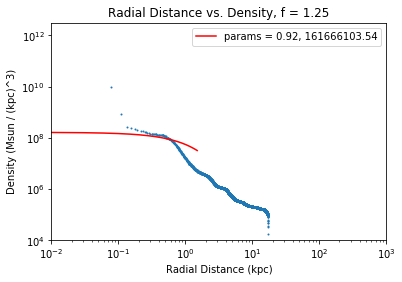

In [50]:
path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r256/radial0400.h5'
hf125 = h5py.File(path125, 'r')
dist125 = np.array(hf125['distances'])
dens125 = np.array(hf125['densities'])
res = fit_profile_exp(dist125, dens125, 1.5)
rc125 = np.abs(res.x[0])
rho125 = res.x[1]

print(res)

plt.scatter(dist125, dens125, s = 1)
plt.plot(np.linspace(0, 1.5, 100000), expon(np.linspace(0, 1.5, 100000), rc125, rho125), 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('Density (Msun / (kpc)^3)')
plt.title('Radial Distance vs. Density, f = 1.25')
plt.ylim(10**4, 10**(12.5))
plt.xlim(10**(-2), 10**(3))
paramstr = 'params = ' + "%.2f" % rc125 + ", " + "%.2f" % rho125 
plt.legend([paramstr])
#plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/simple_function/)